<a href="https://colab.research.google.com/github/joannawqy/ECON323/blob/main/FinalProject_lasso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LassoCV
from sklearn.linear_model import lasso_path
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('merged_data.csv')
df.head()
df.columns

Index(['country', 'Code', 'ContinentCode', 'year',
       'GDP per capita constant 2010 dollars',
       'Capital investment as percent of GDP',
       'Capital investment billion USD',
       'Household consumption as percent of GDP',
       'Household consumption billion USD', 'Labor force million people',
       'Government spending as percent of GDP',
       'Government spending billion USD', 'Tax revenue percent of GDP',
       'Population growth percent', 'Happiness Index 0 (unhappy) - 10 (happy)',
       'Economic growth: the rate of change of real GDP',
       'Gross Domestic Product billions of 2010 U.S. dollars',
       'Unemployment rate', 'Exports of goods and services billion USD',
       'Exports of goods and services annual growth',
       'Imports of goods and services billion USD',
       'Current account balance billion USD',
       'Research and development expenditure percent of GDP',
       'Public spending on education percent of GDP', 'ranking index'],
      dtyp

In [ ]:
df.columns

Index(['country', 'Code', 'ContinentCode', 'year',
       'GDP per capita constant 2010 dollars',
       'Capital investment as percent of GDP',
       'Capital investment billion USD',
       'Household consumption as percent of GDP',
       'Household consumption billion USD', 'Labor force million people',
       'Government spending as percent of GDP',
       'Government spending billion USD', 'Tax revenue percent of GDP',
       'Population growth percent', 'Happiness Index 0 (unhappy) - 10 (happy)',
       'Economic growth: the rate of change of real GDP',
       'Gross Domestic Product billions of 2010 U.S. dollars',
       'Unemployment rate', 'Exports of goods and services billion USD',
       'Exports of goods and services annual growth',
       'Imports of goods and services billion USD',
       'Current account balance billion USD',
       'Research and development expenditure percent of GDP',
       'Public spending on education percent of GDP', 'ranking index'],
      dtyp

In [ ]:
X = df.drop(['country', 'Code', 'ContinentCode', 'year', 'ranking index'], axis=1)
y = df['ranking index']

In [ ]:
X.head()

,GDP per capita constant 2010 dollars,Capital investment as percent of GDP,Capital investment billion USD,Household consumption as percent of GDP,Household consumption billion USD,Labor force million people,Government spending as percent of GDP,Government spending billion USD,Tax revenue percent of GDP,Population growth percent,Happiness Index 0 (unhappy) - 10 (happy),Economic growth: the rate of change of real GDP,Gross Domestic Product billions of 2010 U.S. dollars,Unemployment rate,Exports of goods and services billion USD,Exports of goods and services annual growth,Imports of goods and services billion USD,Current account balance billion USD,Research and development expenditure percent of GDP,Public spending on education percent of GDP
0,13595.04,18.21,117.22,66.74,429.55,19.58,17.70,113.90,10.94,1.04,6.60,2.82,598.8,8.35,72.86,2.62,89.91,-31.15,0.56,5.45
1,13105.40,16.61,87.19,69.47,364.59,20.10,15.81,82.95,9.99,1.02,6.39,-2.62,583.1,9.22,75.77,0.65,85.68,-27.08,0.49,4.88
2,12716.22,14.21,63.63,66.13,296.09,20.61,16.44,73.63,10.59,0.99,6.09,-2.00,571.5,9.84,80.26,9.75,65.85,-3.49,0.46,4.72
3,11341.27,14.13,54.48,63.79,245.94,19.41,16.89,65.12,10.87,0.97,5.93,-9.94,514.6,11.46,64.04,-17.71,52.47,3.12,NaN,5.02
4,12402.49,17.47,85.14,60.89,296.69,21.19,15.84,77.19,11.48,0.95,5.97,10.40,568.1,8.74,87.87,9.22,72.82,6.71,NaN,NaN


In [ ]:
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

In [ ]:
X_train

array([[ 9.21610981e-01, -1.89009111e-01, -2.09576123e-01, ...,
        -5.29822170e-02, -3.78283909e-01,  2.77171551e-02],
       [-2.62156902e-01, -4.65960158e-01, -1.14726000e-01, ...,
        -2.81428016e-01,  0.00000000e+00, -8.57165008e-16],
       [ 2.73120052e+00,  8.08014661e-01, -3.53750328e-01, ...,
         2.35287999e-01,  0.00000000e+00, -8.57165008e-16],
       ...,
       [-1.34516158e+00, -9.98420882e-01, -3.10190527e-01, ...,
         6.25623845e-02, -2.08747945e+00, -8.57165008e-16],
       [-1.23514234e+00,  0.00000000e+00,  0.00000000e+00, ...,
         2.69949749e+00,  0.00000000e+00, -8.57165008e-16],
       [ 7.18940272e-01,  2.52325785e-01, -3.44272038e-01, ...,
         1.93063090e-01,  0.00000000e+00, -8.57165008e-16]])

In [ ]:
lasso_cv = LassoCV(cv=5)
lasso_cv.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11209.10990453884, tolerance: 8275.081386885246
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11633.08432706818, tolerance: 8275.081386885246
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11649.90039685741, tolerance: 8275.081386885246
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWar

LassoCV(cv=5)

Index(['Tax revenue percent of GDP', 'Imports of goods and services billion USD'], dtype='object')


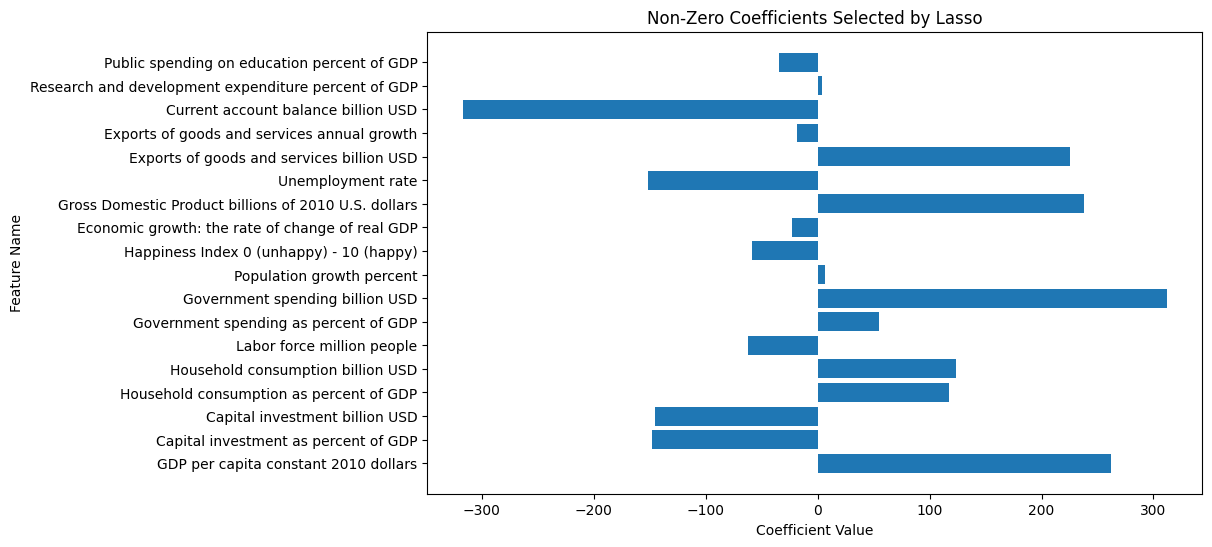

In [ ]:
coefs = lasso_cv.coef_
features = X.columns

# Filter out the non-zero coefficients and their corresponding feature names
selected_features = features[coefs != 0]
selected_coefs = coefs[coefs != 0]
unselected_features = features[coefs == 0]
print(unselected_features)

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.barh(selected_features, selected_coefs)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature Name')
plt.title('Non-Zero Coefficients Selected by Lasso')
plt.show()

In [ ]:
y_pred = lasso_cv.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 243415.37720518597


In [ ]:
print(f"Best alpha: {lasso_cv.alpha_}")
coef_dict = {df.columns[i+4]: lasso_cv.coef_[i] for i in range(len(df.columns)-5)}
print(coef_dict)

Best alpha: 7.873999902800354
{'GDP per capita constant 2010 dollars': 262.4899900818571, 'Capital investment as percent of GDP': -148.35859466344007, 'Capital investment billion USD': -145.11542311904043, 'Household consumption as percent of GDP': 117.6718919304828, 'Household consumption billion USD': 123.23323623601972, 'Labor force million people': -61.868253227633, 'Government spending as percent of GDP': 55.10846827625502, 'Government spending billion USD': 312.1083592843328, 'Tax revenue percent of GDP': 0.0, 'Population growth percent': 6.365210617015013, 'Happiness Index 0 (unhappy) - 10 (happy)': -58.75759316217983, 'Economic growth: the rate of change of real GDP': -23.120461368807025, 'Gross Domestic Product billions of 2010 U.S. dollars': 238.2753836069381, 'Unemployment rate': -151.8349300440346, 'Exports of goods and services billion USD': 225.52489621082321, 'Exports of goods and services annual growth': -18.05661898206782, 'Imports of goods and services billion USD': 0